In [291]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [292]:
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
Token = 'yoVFkAKoWYoOcIqPtXRBolQVwygTyqin'
station_id = 'GHCND:IN023351200'


In [293]:
allC=['IN','IT','FR','SP','UK','BR','ASN','US','CH','IR','SW','GM']
lockdown=pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=2dcf78defb92930a')
lockdown=lockdown[['country_region','sub_region_1','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline' ,'workplaces_percent_change_from_baseline' ,'residential_percent_change_from_baseline']]

lockdown.columns = ['country','state',
                    'date','retail_and_recreation','grocery_and_pharnacy'
                    ,'transit_stations' ,'workplaces' ,'residential']

c:\users\sastry\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# prepare dataset for india


In [294]:
weather=pd.read_csv('citiesStatesUpdated.csv')
weather.columns=['city','state','population','weather_id']
city_index=weather.columns.get_loc('city')
id_index=weather.columns.get_loc('weather_id')

final1=pd.DataFrame(columns=['state','date','avg_temp','city',
                             'retail_and_recreation','grocery_and_pharnacy','transit_stations' 
                             ,'workplaces' ,'residential'])

cities_IN=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population',header=0)
cities_IN=cities_IN[0]
cities_IN=cities_IN[['City','State or union territory','Population(2011)[3]']]
cities_IN=cities_IN.head(15)
cities_IN.replace(to_replace ="Visakhapatnam[a][5]", value ="Visakhapatnam", inplace=True)
cities_IN.columns = ['city','state','population']

# Temp Data

In [295]:
def getWeatherData(weatherID,city):
    # initialize lists to store data
    dates_temp = []
    dates_prcp = []
    temps = []
    prcp = []
    year = str(2020)
    # make the api call
    r = requests.get(
        'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&units=metric&limit=1000&stationid=GHCND:'+weatherID+'&startdate=' + year + '-01-01&enddate=' + year + '-12-31',
        headers={'token': Token})
#     print (r)
    # load the api response as a json
    d = json.loads(r.text)
    # get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype'] == 'TAVG']
    # get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    # get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]
    #initialize dataframe
    df_temp = pd.DataFrame()
    #populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
    df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
    df_temp['avgTemp'] = [float(v) for v in temps]
    df_temp['date']=df_temp['date'].astype(str)
    df_temp['city']=str(city)
    
    return df_temp

In [296]:
for i in range(0,1):
    temp=getWeatherData(weather.iat[i, id_index],weather.iat[i,city_index])
    last=pd.merge(temp,k)
    

# Joining cities and lockdown = df1

In [297]:
weather['state']=weather['state'].astype(str)
lockdown['state']=lockdown['state'].astype(str)
df1  = pd.merge(weather,lockdown)

In [298]:
df2=pd.DataFrame()


In [299]:
for i in range(0,15):
    temp=getWeatherData(weather.iat[i, id_index],weather.iat[i,city_index])
    last=pd.merge(temp,df1)
    
    df2=pd.concat([df2,last])
    last.empty

# Combining all the dataframes

In [300]:
covid_in = pd.read_csv('final_IN.csv')

In [316]:
covid_in['city']=covid_in['city'].astype(str)
covid_in['date']=pd.to_datetime(covid_in['date'], format="%d-%m-%Y")
covid_in['date'] = covid_in['date'].dt.strftime('%d-%m-%Y')

df2['city']=df2['city'].astype(str)
# df2['date']=pd.to_datetime(df2['date'], format="%Y-%m-%d")
# df2['date'] = df2['date'].dt.strftime('%d-%m-%Y')


print(covid_in.iat[50,0])
print("-------------------------------------------------------")
print(df2.iat[4,0])

19-04-2020
-------------------------------------------------------
19-02-2020


In [317]:
# df3=pd.DataFrame(columns=['city','count','date','avgTemp','state','population',
#                           'weather_id','country' ,'retail_and_recreation','grocery_and_pharnacy',
#                           'transit_stations','workplaces'])

# df3=pd.merge(df2,covid_in)
# print(covid_in.shape)

Function to combine
covid_in =[ date    city  count]
df2 = [date  avgTemp city  state  population weather_id country retail_and_recreation  grocery_and_pharnacy  transit_stations  workplaces]

In [323]:
def getDF():
    k=0
    for row in range(0,len(df2)):
        
       # Getting Current Values from df2
        date_df2=df2.iat[row,0]
        avgTemp_df2=df2.iat[row,1]
        city_df2=str(df2.iat[row,2]).lower()
        state_df2=df2.iat[row,3]
        population_df2=df2.iat[row,4]
        weather_df2=df2.iat[row,5]
        country=df2.iat[row,6]
        retail_and_recreation=df2.iat[row,7]
        grocery_and_pharnacy=df2.iat[row,8]
        transit_stations=df2.iat[row,9]
        workplaces=df2.iat[row,10]
        residential=df2.iat[row,11]
        for i in range(0,len(covid_in)):
            # Getting Current Values from covid_in
            date_covid=covid_in.iat[i,0]
            city_covid=str(covid_in.iat[i,1]).lower()
            count_covid=covid_in.iat[i,2]
            
            if (date_df2==date_covid and city_df2==city_covid):
                df3.loc[k]=[date_df2,avgTemp_df2,city_df2,state_df2,
                              population_df2,weather_df2
                              ,country,retail_and_recreation
                              ,grocery_and_pharnacy
                              ,transit_stations,workplaces,residential,count_covid]
                k+=1 
                

In [333]:
getDF()
    

In [337]:
df3.columns=['date','avgTemp','city','state','population','weather_id',
            'country','retail_and_recreation','grocery_and_pharnacy','transit_stations'
             ,'workplaces','residential','count']

In [339]:
df3.to_csv('final_final_final.csv',index=False)

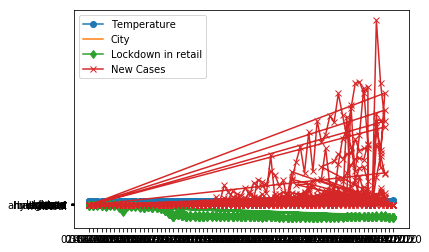

In [341]:
# plt.plot(df3['date'], df3['avgTemp'],'-o',label='Temperature') 
# plt.plot(df3['date'], df3['city'],label='City') 
# plt.plot(df3['date'],df3['retail_and_recreation'],'-d',label='Lockdown in retail')
# plt.plot(df3['date'],df3['count'],'-x',label='New Cases')

# plt.legend(loc="upper left")